# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [52]:
df = pd.read_csv("house_price_bd.csv")

In [53]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [54]:
df.shape

(3865, 9)

In [55]:
df.describe()

,Bedrooms,Bathrooms,Floor_area
count,2864.000000,2864.000000,3766.000000
mean,3.133031,2.992668,1940.299522
std,2.215457,0.978434,6024.921935
min,1.000000,1.000000,84.000000
25%,3.000000,3.000000,1100.000000
50%,3.000000,3.000000,1380.000000
75%,3.000000,3.000000,1860.000000
max,50.000000,10.000000,195840.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


<a id="Section-one" ></a>
# Data cleaning

## Duplicates

In [57]:
df_clean = df.copy()

In [58]:
df_clean.duplicated().sum()

934

In [59]:
df_clean.drop_duplicates(inplace = True)

In [60]:
df_clean.shape

(2931, 9)

## Missing data

In [61]:
df_clean.isna().sum()

Title                 0
Bedrooms            831
Bathrooms           831
Floor_no            575
Occupancy_status     89
Floor_area           89
City                  0
Price_in_taka         0
Location              6
dtype: int64

### Fixing the Floor number column, in order to deal with the missing values

#### Fixing this column first to clarify also the confusion of floor number

In [62]:
df_clean["Floor_no"].value_counts()

Floor_no
1                       379
4                       306
5                       293
2                       274
3                       261
6                       249
7                       200
8                       184
9                       126
10                       23
11                       20
12                       16
13                        7
Merin City - Purbach      6
14                        2
1st                       1
8th                       1
A1,A2,A3,A4,A5,A6,A7      1
0+7                       1
1F                        1
4th to 8th Backside       1
18                        1
5th                       1
17                        1
G+7                       1
Name: count, dtype: int64

#### Starting with rows contains "Merin City - Purbach"

In [63]:
df_clean[df_clean["Floor_no"] == "Merin City - Purbach"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
3313,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3388,"For Sale, Residential Plot Is Situated In Bpro...",NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3392,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3393,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3432,In The Beautiful Location Of Bproperty Village...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
3492,Plot For Sale In A Suitable Place In Narayanga...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"


#### Dropping these rows as we have 0 information about Bedrooms & Bathrooms + we can't implent values of floor number

In [64]:
df_clean = df_clean[df_clean['Floor_no'] != 'Merin City - Purbach']

#### Moving to where we have "4th to 8th Backside"

In [65]:
df_clean[df_clean['Floor_no'] == '4th to 8th Backside']

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,4th to 8th Backside,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"


#### We can see that these are apartments, so i created 4 new rows, each row contains a floor number for each apartment

In [66]:
# Rows to replace (indices where 'Floor_no' contains '4th to 8th Backside')
rows_to_replace = df_clean[df_clean['Floor_no'] == '4th to 8th Backside']

# Create new rows for each floor from 4 to 8
new_rows = []
for i in range(4, 9):  # Floors from 4 to 8
    for index, row in rows_to_replace.iterrows():
        new_row = row.copy()
        new_row['Floor_no'] = i  # Set the floor number as a numeric value
        new_rows.append(new_row)

# Convert the list of new rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Remove the original rows
df_clean = df_clean.drop(rows_to_replace.index)

# Use pd.concat() to append the new rows to the DataFrame
df_clean = pd.concat([df_clean, new_rows_df], ignore_index=True)

In [67]:
new_rows_df

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,4,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,5,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,6,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,7,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,8,vacant,1250.0,chattogram,"৳3,800,000","Dakshin Kattali, 11 No. South Kattali Ward"


#### Moving to where we have character beside the floor number (eg; th, st, ect)

In [68]:
df_clean[df_clean["Floor_no"] == "8th"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
34,An Apartment For Sale Is All Set For You To Se...,3.0,3.0,8th,vacant,1100.0,dhaka,"৳4,700,000","Dhaka Uddan, Mohammadpur"


In [69]:
df_clean[df_clean["Floor_no"] == "5th"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
2126,Take This Residential Flat Is For Sale At Baya...,3.0,2.0,5th,vacant,1162.0,chattogram,"৳5,000,000","Chadra Nagar, Bayazid"


In [70]:
df_clean[df_clean["Floor_no"] == "1st"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
741,Imagine A Spacious Flat That Comes With Your A...,4.0,5.0,1st,vacant,2380.0,dhaka,"৳29,000,000","Block D, Bashundhara R-A"


In [71]:
df_clean[df_clean["Floor_no"] == "1F"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
1551,"At Bayazid, Flat For Sale Close To Bayazid Thana",3.0,3.0,1F,vacant,1313.0,chattogram,"৳6,500,000","Chadra Nagar, Bayazid"


#### I chose to simply remove the characters

In [72]:
df_clean["Floor_no"] = df_clean["Floor_no"].str.replace(r"th|st|F", "", regex=True)

#### Moving to where we have "G+7" & "0+7"

In [73]:
df_clean[(df_clean["Floor_no"] == "G+7") | (df_clean["Floor_no"] == "0+7")]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
217,19200 SQ FT Full-Building is now for sale in M...,46.0,10.0,G+7,vacant,19200.0,dhaka,"৳75,000,000","Section 1, Mirpur"
1458,A Residential Building Which Is Up For Sale At...,21.0,10.0,0+7,vacant,13300.0,chattogram,"৳105,000,000","Rose Valley Residential Area, 9 No. North Paha..."


#### We clearly see from the title that these are buildings, and i interpreted it as follow G+7 = Ground + 7floors, same goes for 0+7, i chose to replace G+7 and 0+7 by 8 

In [74]:
df_clean["Floor_no"] = df_clean["Floor_no"].str.replace(r"G\+7|0\+7", "8", regex=True)

#### Moving to where we have "A1, A2, ..., A7"

In [75]:
df_clean[df_clean["Floor_no"] == "A1,A2,A3,A4,A5,A6,A7"]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
1104,A Full Building Is For Sale In Sugandha Reside...,18.0,10.0,"A1,A2,A3,A4,A5,A6,A7",vacant,10890.0,chattogram,"৳105,000,000","Sugandha Residential Area, Panchlaish"


#### We can see that this is a building containing 7apartments, i chose to replace it by 4floors, each floor contain 2apartment except for the last one that has only 1.

In [76]:
df_clean["Floor_no"] = df_clean["Floor_no"].str.replace("A1,A2,A3,A4,A5,A6,A7", "4")

#### Now after cleaning the column we can deal with the missing values

In [77]:
df_clean["Floor_no"].value_counts(dropna = False)

Floor_no
NaN    580
1      381
4      307
5      294
2      274
3      261
6      249
7      200
8      187
9      126
10      23
11      20
12      16
13       7
14       2
18       1
17       1
Name: count, dtype: int64

In [78]:
df_clean["Floor_no"] = df_clean["Floor_no"].astype("float")

In [79]:
df_clean.dtypes

Title                object
Bedrooms            float64
Bathrooms           float64
Floor_no            float64
Occupancy_status     object
Floor_area          float64
City                 object
Price_in_taka        object
Location             object
dtype: object

#### To clarify Floor_no (floor number) confusion i added a new field (Type of propertie for sale). Floor number can be missleading it might mean the floor number that the appartment exist in, or it can mean the number of floors in a building.
#### In order to create these columns i utilized the title column.

In [80]:
building_pattern = r"building|complex|condominium|residence|property"
apartment_pattern = r"apartment|flat|living space|apt."
commercial_pattern = r"office|shop|retail|business|commercial space|warehouse|factory|store|business center|showroom|industrial space|market|plaza|outlet|commercial"
house_pattern = r"house|residential|cottage|bungalow|duplex|townhouse|family home|detached house|semi-detached house|ranch|estate|home"

In [81]:
df_clean = df_clean.assign(
    Building = np.where(
        df_clean["Title"].str.lower().str.contains(building_pattern, regex=True),1, 0),
    Apartment = np.where(
        df_clean["Title"].str.lower().str.contains(apartment_pattern, regex=True), 1, 0),
    Commercial = np.where(
        df_clean["Title"].str.lower().str.contains(commercial_pattern, regex=True), 1, 0),
    House = np.where(
        df_clean["Title"].str.lower().str.contains(house_pattern, regex=True), 1, 0)
    )

In [82]:
cities = pd.get_dummies(df_clean["City"], drop_first = True).astype("int")

Occupancy = pd.get_dummies(df_clean["Occupancy_status"], drop_first = True).astype("int")

df_clean = pd.concat([df_clean, cities, Occupancy], axis = 1)

df_clean = df_clean.rename(columns = {"chattogram": "Chattogram_city",
                                      "cumilla": "Cumilla_city",
                                      "dhaka": "Dhaka_city",
                                      "narayanganj-city": "Narayanganj_city",
                                      "gazipur": "Gazipur_city"})

df_clean["Price_in_taka"] = df_clean["Price_in_taka"].str.replace("৳|,","", regex = True).astype("float")

In [83]:
df_clean.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,dhaka,39000000.0,"Gulshan 1, Gulshan",0,1,0,0,0,1,0,0,1
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1.0,vacant,1705.0,dhaka,16900000.0,"Lake Circus Road, Kalabagan",0,1,0,0,0,1,0,0,1
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6.0,vacant,1370.0,dhaka,12500000.0,"Shukrabad, Dhanmondi",0,1,0,0,0,1,0,0,1
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4.0,vacant,2125.0,dhaka,20000000.0,"Block L, Bashundhara R-A",0,1,0,0,0,1,0,0,1
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4.0,vacant,2687.0,dhaka,47500000.0,"Road No 25, Banani",0,1,0,0,0,1,0,0,1


In [84]:
#pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

### Missing values of bedrooms, bathrooms and floor number columns 

#### We have 18 floor_no and we have building , appartment , house and commercial. Now i calculated median for each floor_no for building, appartment, house, and for commercial. After that i used these medians that we calculated to fill missing values of bedrooms and bathrooms in each 18floor_no and each property type (building apprtement house and commercial)

#### Median of floor number

In [85]:
# Create dictionaries to hold median floor numbers
median_floor_no = {
    "Building": None,
    "Apartment": None,
    "House": None,
    "Commercial": None
}

# Calculate median floor_no for each property type
for property_type in ["Building", "Apartment", "House", "Commercial"]:
    sub_df = df_clean[df_clean[property_type] == 1]
    median_floor_no[property_type] = sub_df["Floor_no"].median()


In [86]:
def fill_missing_floor_no(row):
    property_type = "Building" if row["Building"] == 1 else (
        "Apartment" if row["Apartment"] == 1 else (
            "House" if row["House"] == 1 else (
                "Commercial" if row["Commercial"] == 1 else None
            )
        )
    )
    
    if property_type:
        if pd.isna(row["Floor_no"]):
            row["Floor_no"] = median_floor_no[property_type]
    
    return row

# Apply the function to fill missing Floor_no values
df_clean = df_clean.apply(fill_missing_floor_no, axis=1)


#### Median of bedroom and bathrooms based on the floor number

In [87]:
# Create dictionaries to hold median values
median_values = {
    "Building": {},
    "Apartment": {},
    "House": {},
    "Commercial": {}
}

# Calculate medians for each property type and floor_no
for property_type in ["Building", "Apartment", "House", "Commercial"]:
    for floor in range(1, 19):  
        sub_df = df_clean[(df_clean["Floor_no"] == floor) & (df_clean[property_type] == 1)]
        median_values[property_type][floor] = {
            "Bedrooms": sub_df["Bedrooms"].median(),
            "Bathrooms": sub_df["Bathrooms"].median()
        }

In [88]:
def fill_missing_values(row):
    property_type = "Building" if row["Building"] == 1 else (
        "Apartment" if row["Apartment"] == 1 else (
            "House" if row["House"] == 1 else (
                "Commercial" if row["Commercial"] == 1 else None
            )
        )
    )
    
    if property_type:
        floor = row["Floor_no"]
        if floor in median_values[property_type]:
            if pd.isna(row["Bedrooms"]):
                row["Bedrooms"] = median_values[property_type][floor]["Bedrooms"]
            if pd.isna(row["Bathrooms"]):
                row["Bathrooms"] = median_values[property_type][floor]["Bathrooms"]
    
    return row

# Apply the function to fill missing values
df_clean = df_clean.apply(fill_missing_values, axis=1)


#### Our data set after filling the 3columns with thier respective medians

In [89]:
df_clean.isna().sum()

Title                0
Bedrooms            94
Bathrooms           94
Floor_no            79
Occupancy_status    89
Floor_area          89
City                 0
Price_in_taka        0
Location             6
Building             0
Apartment            0
Commercial           0
House                0
Cumilla_city         0
Dhaka_city           0
Gazipur_city         0
Narayanganj_city     0
vacant               0
dtype: int64

### After treating each column alone, i chose to finally start dropping rows where we can't fill with the median or anyother way

#### Remove rows where we have no information about Bedrooms, Bathrooms, Floor number, and Floor area

In [90]:
df_clean[(df_clean["Floor_no"].isna())&(df_clean["Bedrooms"].isna())&(df_clean["Bathrooms"].isna())&(df_clean["Floor_area"].isna())]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant
1031,5 Katha Plot Is Ready For Sale At Uttar Khan,NaN,NaN,NaN,NaN,NaN,dhaka,10000000.0,"Mainertek, Uttar Khan",0,0,0,0,0,1,0,0,0
1034,3 Katha Plot is now available for sale in Ashulia,NaN,NaN,NaN,NaN,NaN,dhaka,4000000.0,"Ashulia, Savar",0,0,0,0,0,1,0,0,0
1042,Plot For Sale in Turag close to DBBL ATM,NaN,NaN,NaN,NaN,NaN,dhaka,7500000.0,Turag,0,0,0,0,0,1,0,0,0
1045,5.445 Katha Large Plot For Sale In Ashulia,NaN,NaN,NaN,NaN,NaN,dhaka,5500000.0,"Ashulia, Savar",0,0,0,0,0,1,0,0,0
1079,View This 9 Katha Plot For Sale At Ashulia,NaN,NaN,NaN,NaN,NaN,dhaka,5985000.0,"Ashulia, Savar",0,0,0,0,0,1,0,0,0
1088,"3.33 Katha Plot Is Up For Sale In Demra, Sarulia",NaN,NaN,NaN,NaN,NaN,dhaka,6827500.0,"Sarulia, Demra",0,0,0,0,0,1,0,0,0
1367,test listing ma 24.6:2,NaN,NaN,NaN,NaN,NaN,chattogram,54235.0,NaN,0,0,0,0,0,0,0,0,0
1368,test listing ma 22.6:2,NaN,NaN,NaN,NaN,NaN,chattogram,6669.0,NaN,0,0,0,0,0,0,0,0,0
1406,tesdt 2,NaN,NaN,NaN,NaN,NaN,chattogram,66.0,NaN,0,0,0,0,0,0,0,0,0
1789,Plot for sale in Pahartali near Pahartali Eye ...,NaN,NaN,NaN,NaN,NaN,chattogram,23000000.0,"West Khulshi, 9 No. North Pahartali Ward",0,0,0,0,0,0,0,0,0


In [91]:
df_clean = df_clean.drop(df_clean[(df_clean["Floor_no"].isna()) &
                                  (df_clean["Bedrooms"].isna()) &
                                  (df_clean["Bathrooms"].isna()) &
                                  (df_clean["Floor_area"].isna())].index)

#### Data set

In [92]:
df_clean.isna().sum()

Title                0
Bedrooms            81
Bathrooms           81
Floor_no            66
Occupancy_status    76
Floor_area          76
City                 0
Price_in_taka        0
Location             1
Building             0
Apartment            0
Commercial           0
House                0
Cumilla_city         0
Dhaka_city           0
Gazipur_city         0
Narayanganj_city     0
vacant               0
dtype: int64

#### Fixing Location missing value

In [93]:
df_clean[df_clean["Location"].isna()]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant
383,1254 Sq Ft Flat For Sale In Kalachandpur,3.0,3.0,6.0,vacant,1254.0,dhaka,8300000.0,NaN,0,1,0,0,0,1,0,0,1


#### We can see from the title the location of this property

In [94]:
df_clean.loc[df_clean["Location"].isna(), "Location"] = "Kalachandpur"

#### Dropping rows where we have no information about bedrooms, bathrooms, floor area, occupancy status, and floor number 81 rows

In [95]:
df_clean = df_clean.dropna(subset=["Bedrooms", "Floor_area"])

In [96]:
df_clean.isna().sum()

Title               0
Bedrooms            0
Bathrooms           0
Floor_no            0
Occupancy_status    0
Floor_area          0
City                0
Price_in_taka       0
Location            0
Building            0
Apartment           0
Commercial          0
House               0
Cumilla_city        0
Dhaka_city          0
Gazipur_city        0
Narayanganj_city    0
vacant              0
dtype: int64

#### Our final dataset after cleaning

In [97]:
df_clean.shape

(2759, 18)

# Exploratory data analysis

## Exploring the target

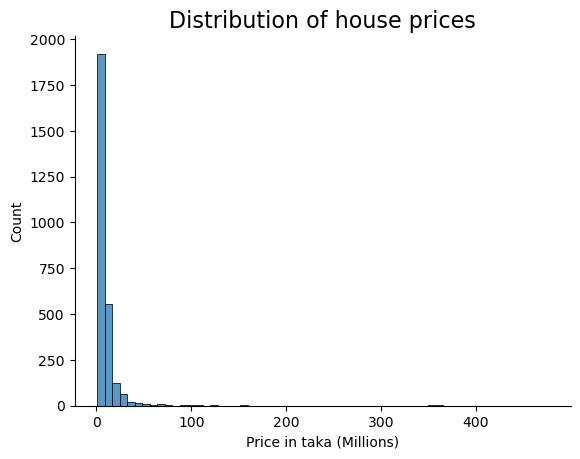

In [98]:
sns.histplot(df_clean['Price_in_taka'] / 10**6, bins = 60)
sns.despine()
plt.xlabel("Price in taka (Millions)")
plt.title('Distribution of house prices', fontsize = 16)
plt.show()

### Correlation analysis

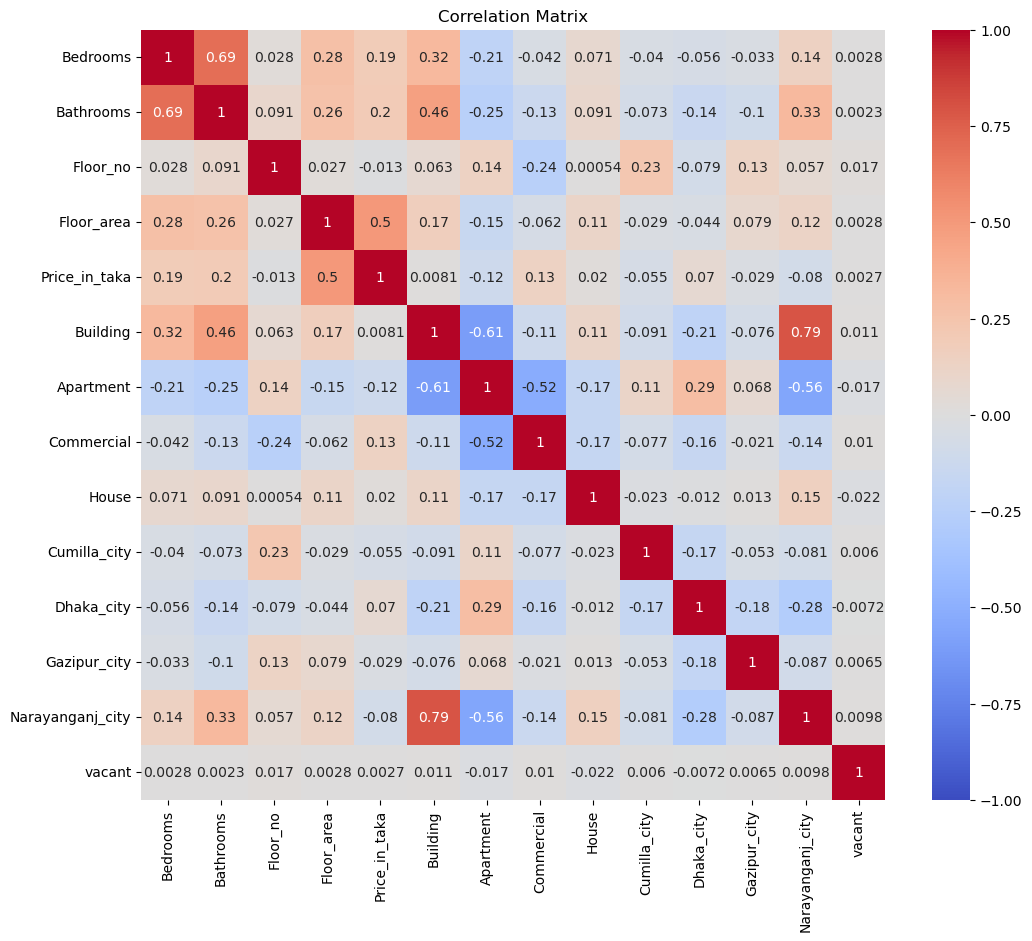

In [99]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title('Correlation Matrix')
plt.show()

## Exploring the features

### City-wise analysis

<function matplotlib.pyplot.show(close=None, block=None)>

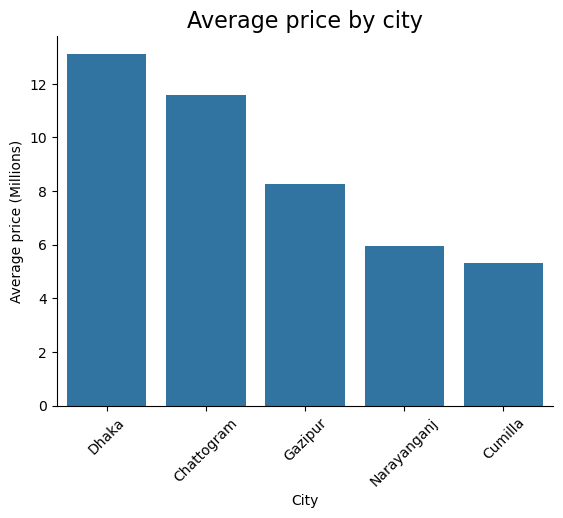

In [100]:
city_name_mapping = {
    "cumilla": "Cumilla",
    "narayanganj-city": "Narayanganj",
    "gazipur": "Gazipur",
    "chattogram": "Chattogram",
    "dhaka": "Dhaka"
}

city_group = df_clean.groupby('City')['Price_in_taka'].mean().sort_values(ascending = False)

city_group = city_group.rename(index=city_name_mapping)

sns.barplot(x = city_group.index, y = city_group.values / 10**6)
plt.title('Average price by city', fontsize = 16)
plt.ylabel("Average price (Millions)")
plt.xticks(rotation=45)
sns.despine()
plt.show

### Categorical data analysis

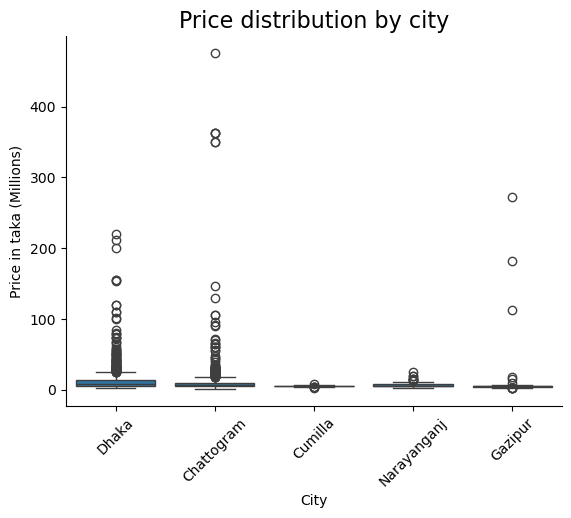

In [101]:
df_clean["City"] = df_clean["City"].map(city_name_mapping)

sns.boxplot(x='City', y=df_clean['Price_in_taka'] / 10**6, data=df_clean)
plt.title('Price distribution by city', fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel("Price in taka (Millions)")
sns.despine()
plt.show()


### Price vs. Floor Area

In [102]:
df_clean = df_clean.assign(
    Property = np.where(df_clean["Apartment"] == 1, "Apartment",
                        np.where(df_clean["Commercial"] == 1, "Commercial", 
                                 np.where(df_clean["House"] == 1, "House", "Building")))
)

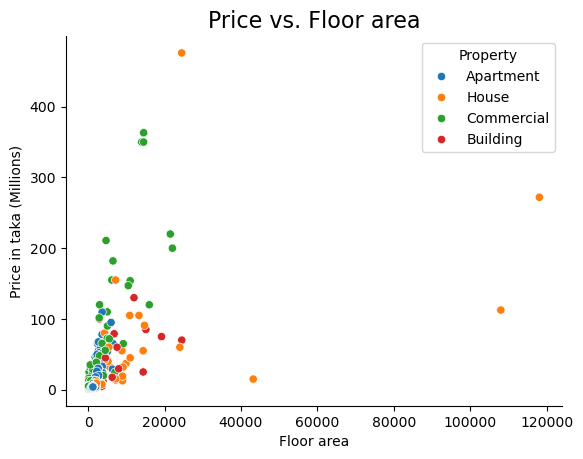

In [103]:
sns.scatterplot(x='Floor_area', y=df_clean['Price_in_taka']/10**6, hue = "Property", data=df_clean)
plt.title('Price vs. Floor area', fontsize = 16)
sns.despine()
plt.ylabel("Price in taka (Millions)")
plt.xlabel("Floor area")
plt.show()


### Price vs Floor number

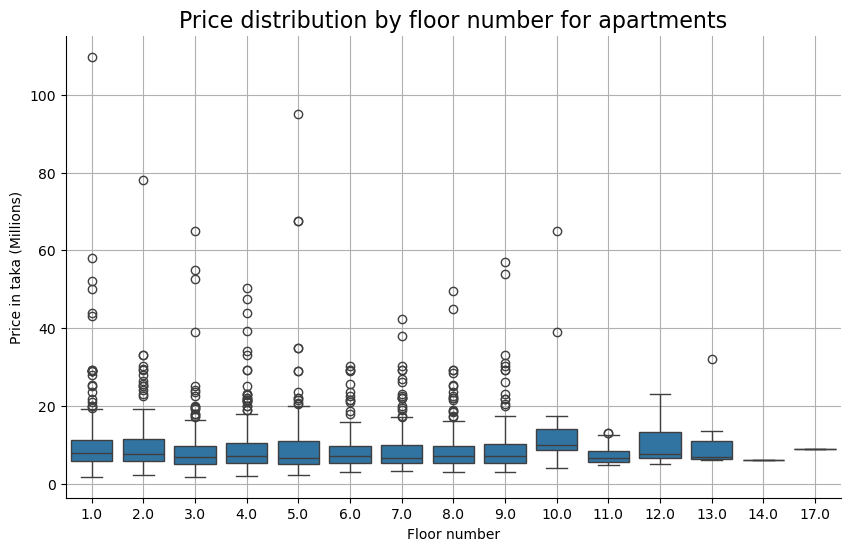

In [104]:
# Filter the data for apartments
df_apartments = df_clean[df_clean['Apartment'] == 1]

# Box plot for Apartments
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_apartments, x='Floor_no', y=df_apartments['Price_in_taka']/10**6)
plt.title('Price distribution by floor number for apartments', fontsize = 16)
plt.xlabel('Floor number')
plt.ylabel('Price in taka (Millions)')
plt.grid(True)
sns.despine()
plt.show()


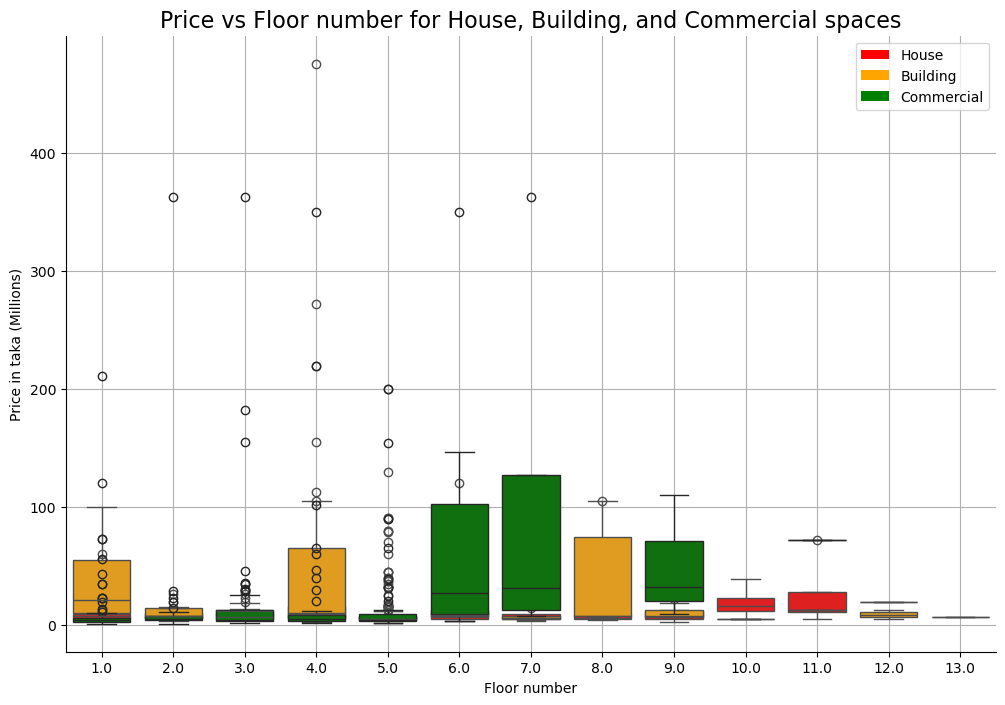

In [105]:
# Filter the data for house, building, or commercial properties
df_others = df_clean[(df_clean['House'] == 1) | (df_clean['Building'] == 1) | (df_clean['Commercial'] == 1)]

plt.figure(figsize=(12, 8))

# Boxplot for house, building, and commercial, without using the 'label' argument
sns.boxplot(data=df_others[df_others['House'] == 1], x='Floor_no', y=df_others[df_others['House'] == 1].loc[:, 'Price_in_taka'] / 10**6, color='red')
sns.boxplot(data=df_others[df_others['Building'] == 1], x='Floor_no', y=df_others[df_others['Building'] == 1].loc[:, 'Price_in_taka'] / 10**6, color='orange')
sns.boxplot(data=df_others[df_others['Commercial'] == 1], x='Floor_no', y=df_others[df_others['Commercial'] == 1].loc[:, 'Price_in_taka'] / 10**6, color='green')

# Titles and labels
plt.title('Price vs Floor number for House, Building, and Commercial spaces', fontsize = 16)
plt.xlabel('Floor number')
plt.ylabel('Price in taka (Millions)')
sns.despine()
plt.grid(True)

# Create a custom legend since label parameter is not available in sns.boxplot
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='House'),
                   Patch(facecolor='orange', label='Building'),
                   Patch(facecolor='green', label='Commercial')]

plt.legend(handles=legend_elements)

# Show the plot
plt.show()


### Price vs Floor area with City as interaction term

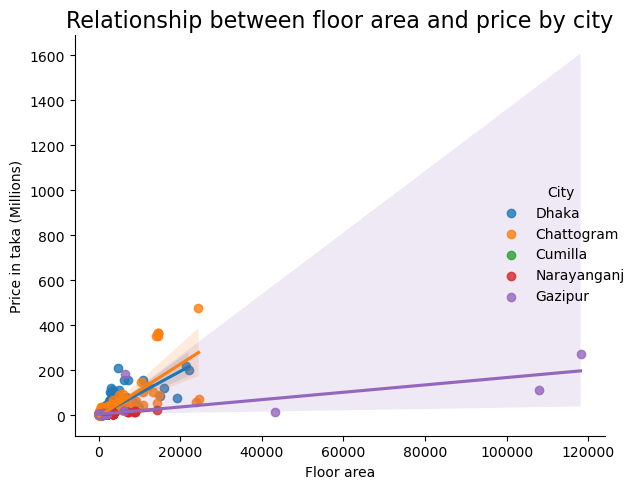

In [106]:
df_clean['Price_in_millions'] = df_clean['Price_in_taka'] / 10**6

sns.lmplot(
    data=df_clean,  
    x="Floor_area",  
    y="Price_in_millions", 
    hue="City", 
)

plt.ylabel("Price in taka (Millions)")
plt.xlabel("Floor area")
plt.title("Relationship between floor area and price by city", fontsize = 16)
plt.tight_layout()
plt.show()


# Preparing the data set for modeling

In [107]:
df_clean.head(1)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Property,Price_in_millions
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,Dhaka,39000000.0,"Gulshan 1, Gulshan",0,1,0,0,0,1,0,0,1,Apartment,39.0


In [108]:
df_model = df_clean[["Bedrooms", "Bathrooms", "Floor_no", "Floor_area",
                     "Building", "Apartment", "Commercial", "House",
                     "Cumilla_city", "Dhaka_city", "Gazipur_city", "Narayanganj_city", "vacant", "Price_in_taka"]]

In [109]:
df_model.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka
0,3.0,4.0,3.0,1960.0,0,1,0,0,0,1,0,0,1,39000000.0
1,3.0,3.0,1.0,1705.0,0,1,0,0,0,1,0,0,1,16900000.0
2,3.0,3.0,6.0,1370.0,0,1,0,0,0,1,0,0,1,12500000.0
3,3.0,3.0,4.0,2125.0,0,1,0,0,0,1,0,0,1,20000000.0
4,3.0,3.0,4.0,2687.0,0,1,0,0,0,1,0,0,1,47500000.0


In [110]:
df_model.describe().round(2)

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka
count,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2.759000e+03
mean,3.19,3.08,4.55,1761.95,0.14,0.71,0.12,0.19,0.05,0.37,0.05,0.12,1.00,1.102447e+07
std,1.84,0.91,2.46,3525.22,0.35,0.45,0.33,0.39,0.21,0.48,0.23,0.32,0.03,2.292219e+07
min,1.00,1.00,1.00,84.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.050000e+06
25%,3.00,3.00,3.00,1100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.800000e+06
50%,3.00,3.00,5.00,1370.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.800000e+06
75%,3.00,3.00,6.00,1800.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.000000e+07
max,50.00,10.00,17.00,118080.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.760000e+08


In [111]:
df_model.corr()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka
Bedrooms,1.000000,0.694013,0.027940,0.276378,0.321179,-0.207523,-0.042044,0.070826,-0.040078,-0.056465,-0.032992,0.140666,0.002828,0.188341
Bathrooms,0.694013,1.000000,0.091061,0.264065,0.463559,-0.247033,-0.125891,0.091261,-0.072930,-0.144065,-0.100557,0.326915,0.002263,0.201565
Floor_no,0.027940,0.091061,1.000000,0.026943,0.062815,0.135462,-0.242423,0.000537,0.230429,-0.078585,0.129086,0.057352,0.016911,-0.013152
Floor_area,0.276378,0.264065,0.026943,1.000000,0.170364,-0.153109,-0.061978,0.113226,-0.029226,-0.044457,0.078547,0.124137,0.002762,0.504161
Building,0.321179,0.463559,0.062815,0.170364,1.000000,-0.606730,-0.114468,0.111967,-0.091166,-0.209689,-0.075530,0.791833,0.011042,0.008063
Apartment,-0.207523,-0.247033,0.135462,-0.153109,-0.606730,1.000000,-0.521590,-0.165820,0.114770,0.293122,0.067512,-0.560892,-0.017106,-0.115613
Commercial,-0.042044,-0.125891,-0.242423,-0.061978,-0.114468,-0.521590,1.000000,-0.166259,-0.077430,-0.163365,-0.020620,-0.135369,0.010013,0.134739
House,0.070826,0.091261,0.000537,0.113226,0.111967,-0.165820,-0.166259,1.000000,-0.022739,-0.011628,0.012776,0.150512,-0.021742,0.020147
Cumilla_city,-0.040078,-0.072930,0.230429,-0.029226,-0.091166,0.114770,-0.077430,-0.022739,1.000000,-0.170570,-0.053319,-0.080973,0.005989,-0.055300
Dhaka_city,-0.056465,-0.144065,-0.078585,-0.044457,-0.209689,0.293122,-0.163365,-0.011628,-0.170570,1.000000,-0.183922,-0.279311,-0.007227,0.070244


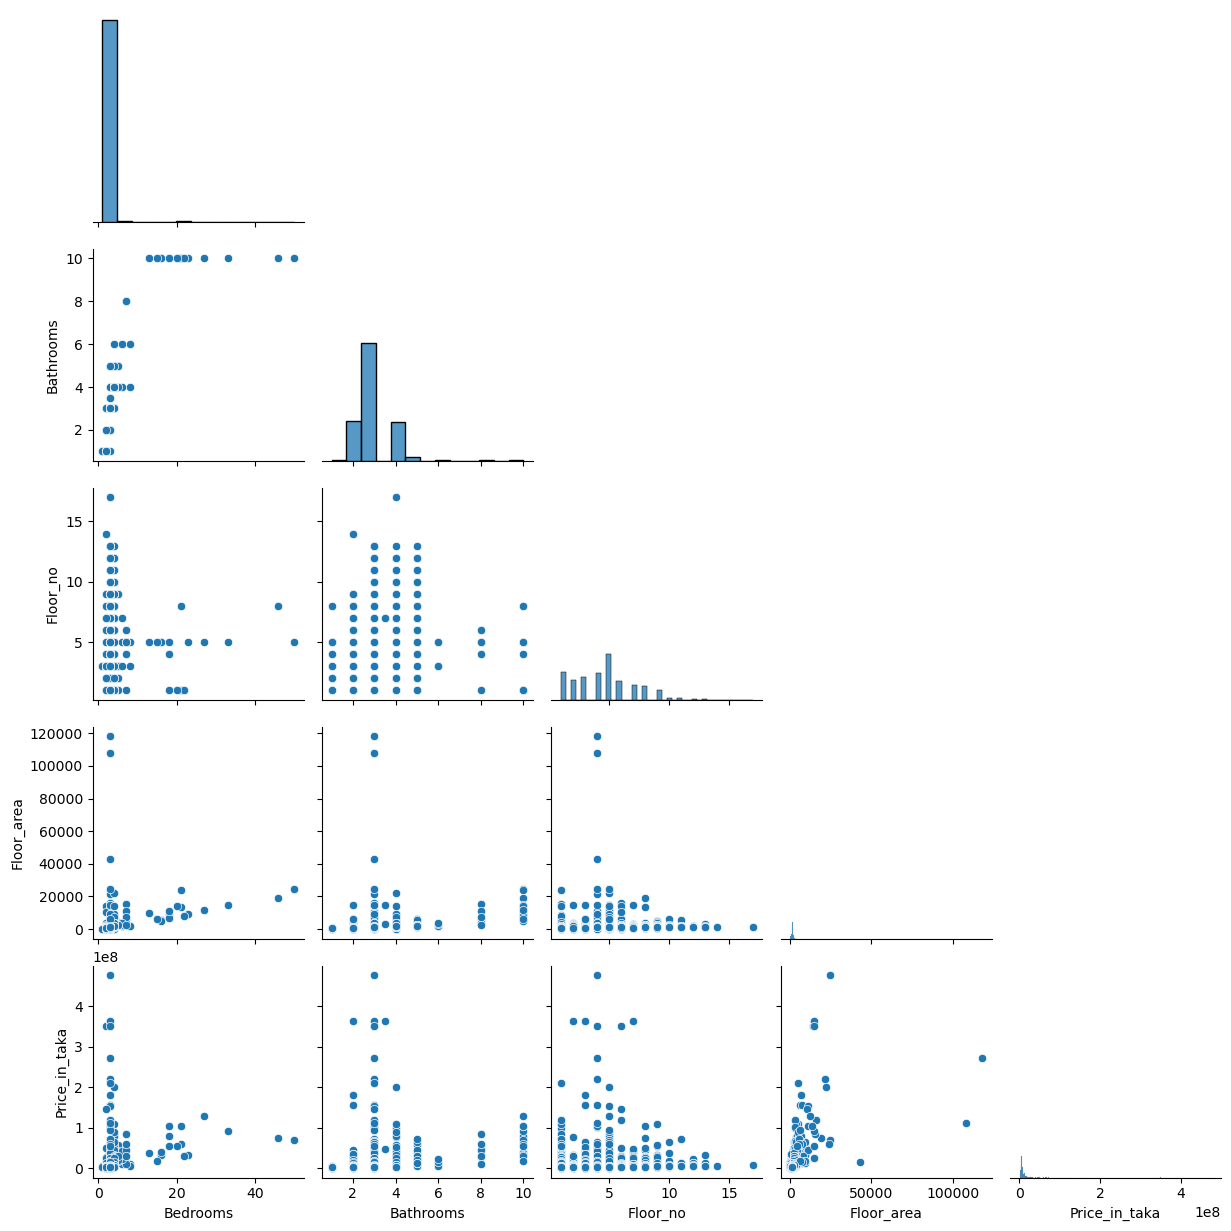

In [112]:
sns.pairplot(df_model[["Bedrooms", "Bathrooms", "Floor_no", "Floor_area", "Price_in_taka"]], corner = True)

In [113]:
df_model.isna().sum()

Bedrooms            0
Bathrooms           0
Floor_no            0
Floor_area          0
Building            0
Apartment           0
Commercial          0
House               0
Cumilla_city        0
Dhaka_city          0
Gazipur_city        0
Narayanganj_city    0
vacant              0
Price_in_taka       0
dtype: int64

# Modeling

## Regression modeling

## Linear Regression

In [114]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## Simple linear regression

In [115]:
# From correlation we see floor area is most correlated with price with 0.5

X = sm.add_constant(np.log(df_model[["Floor_area"]]))
y = np.log(df_model["Price_in_taka"])

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop in each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val))))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross validation R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross validation MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.384, 0.281, 0.397, 0.322, 0.319]
Cross validation R2s: 0.341 +- 0.044
All validation MAEs:  [5516230.491, 4111686.53, 6391301.513, 5603411.06, 6689574.22]
Cross validation MAEs: 5662440.763 +- 896207.763


## Multiple linear regression

## Feature engineering

In [116]:
df_model = df_model.assign(
    price_log = np.log(df_model["Price_in_taka"]),
    Floor_area_log = np.log(df_model["Floor_area"]),
    Bedrooms_Bathrooms = df_model["Bedrooms"] + df_model["Bathrooms"],
    Buil_Commer_House = df_model["Building"] + df_model["Commercial"] + df_model["House"],
    Bedrooms_2 = df_model["Bedrooms"] ** 2,
    Bathrooms_2 = df_model["Bathrooms"] ** 2,
    Bedrooms_3 = df_model["Bedrooms"] ** 3,
    Bathrooms_3 = df_model["Bathrooms"] ** 3,
    Floor_no_2 = df_model["Floor_no"] ** 2,
    Bedrooms_log = np.log(df_model["Bedrooms"]),
    Bathrooms_log = np.log(df_model["Bathrooms"]),
    Bedrooms_Bathrooms_log = np.log(df_model["Bedrooms"] + df_model["Bathrooms"]),
    Bedrooms_Bathrooms_2 = (df_model["Bedrooms"] + df_model["Bathrooms"]) ** 2,
    Floor_area_number_ration = np.where(df_model["Apartment"] == 1, np.log(df_model["Floor_area"]), 
                                        np.log(df_model["Floor_area"] / df_model["Floor_no"])),
    Bedrooms_Floor_area_log = df_model["Bedrooms"] * np.log(df_model["Floor_area"]),
    Bathrooms_Floor_area_log = df_model["Bathrooms"] * np.log(df_model["Floor_area"]),
    Bedrooms_Bathrooms_Floor_area_log = (df_model["Bedrooms"] + df_model["Bathrooms"]) * np.log(df_model["Floor_area"]),
    Bedrooms_2_Floor_area_log = df_model["Bedrooms"] ** 2 * np.log(df_model["Floor_area"]),
    Bathrooms_2_Floor_area_log = df_model["Bathrooms"] ** 2 * np.log(df_model["Floor_area"]),
)

df_model["Bedroom_bins"] = pd.cut(
    df_model["Bedrooms"], 
    bins=[0, 3, 6, 10, np.inf],  
    labels=["1-3 Small", "4-6 Medium", "7-10 Large", "11+ Extra-large"])

In [117]:
X = sm.add_constant(df_model[["Bedrooms", "Bedrooms_2", "Bathrooms", "Bathrooms_2",
                              "Floor_area_log", "Apartment", "Floor_no",
                              "Cumilla_city", "Dhaka_city", "Gazipur_city", "Narayanganj_city"]])
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop in each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val))))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross validation R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross validation MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.719, 0.631, 0.726, 0.648, 0.705]
Cross validation R2s: 0.686 +- 0.039
All validation MAEs:  [3878698.407, 2843080.774, 4637207.744, 3896625.063, 4810351.864]
Cross validation MAEs: 4013192.77 +- 696519.369


In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     356.7
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:44   Log-Likelihood:                -785.65
No. Observations:                1766   AIC:                             1595.
Df Residuals:                    1754   BIC:                             1661.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.5043      0.122     86.002      0.000      10.265      10.744
Bedrooms             0.0843      0.025      3.438      0.001       0.036       0.132
Bedrooms_2          -0.0014      0.000     -3.070      0.002      -0.002      -0.000
Bathrooms            0.5070      0.034     14.708      0.000       0.439       0.575
Bathrooms_2         -0.0480      0.005    -10.156      0.000      -0.057      -0.039
Floor_area_log       0.6433      0.015     41.958      0.000       0.613       0.673
Apartment           -0.5407      0.028    -19.330      0.000      -0.596      -0.486
Floor_no            -0.0101      0.004     -2.562      0.010      -0.018      -0.002
Cumilla_city        -0.2962      0.046     -6.474      0.000      -0.386      -0.206
Dhaka_city           0.1404      0.021      6.542      0.000       0.098       0.182
Gazipur_city        -0.3359      0.042     -7.939      0.000      -0.419      -0.253
Narayanganj_city    -1.5596      0.043    -36.389      0.000      -1.644      -1.475
==============================================================================
Omnibus:                      298.763   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1227.440
Skew:                           0.765   Prob(JB):                    2.92e-267
Kurtosis:                       6.787   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After developing the multiple linear regression model, I explored several advanced regression techniques to
enhance predictive performance:
1. Ridge Regression
Initially, I attempted to apply Ridge Regression using a selection of the best-performing features. However, I
observed only a minimal improvement in performance. To fully assess the model's capabilities, I then included
all engineered features in the Ridge Regression model, resulting in a notable performance increase of
approximately 7%.
2. Lasso Regression
Following Ridge Regression, I implemented Lasso Regression. This model is particularly useful for feature
selection, as it shrinks some coefficients to zero, effectively eliminating less significant features. By analyzing
the coefficients from the Lasso model, I identified which features contributed the most to the predictions.
3. Elastic Net Regression
Next, I used Elastic Net, which combines the strengths of both Ridge and Lasso regressions. This hybrid
approach allows for regularization while also performing variable selection. Elastic Net is particularly beneficial
when dealing with datasets that have multicollinearity.
4. Model Performance Evaluation
To determine the best model for my dataset, I evaluated the performance of Ridge, Lasso, Elastic Net, and the
multiple linear regression models. The evaluation criteria included:
• R² Score: Indicates the proportion of variance in the dependent variable that can be explained by the
independent variables.
• Mean Absolute Error (MAE): Represents the average absolute differences between the predicted and actual
values, providing insights into the model's accuracy

## Ridge regression

In [119]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [120]:
pd.set_option('display.max_columns', None)
df_model.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Building,Apartment,Commercial,House,Cumilla_city,Dhaka_city,Gazipur_city,Narayanganj_city,vacant,Price_in_taka,price_log,Floor_area_log,Bedrooms_Bathrooms,Buil_Commer_House,Bedrooms_2,Bathrooms_2,Bedrooms_3,Bathrooms_3,Floor_no_2,Bedrooms_log,Bathrooms_log,Bedrooms_Bathrooms_log,Bedrooms_Bathrooms_2,Floor_area_number_ration,Bedrooms_Floor_area_log,Bathrooms_Floor_area_log,Bedrooms_Bathrooms_Floor_area_log,Bedrooms_2_Floor_area_log,Bathrooms_2_Floor_area_log,Bedroom_bins
0,3.0,4.0,3.0,1960.0,0,1,0,0,0,1,0,0,1,39000000.0,17.479072,7.580700,7.0,0,9.0,16.0,27.0,64.0,9.0,1.098612,1.386294,1.945910,49.0,7.580700,22.742099,30.322799,53.064898,68.226298,121.291196,1-3 Small
1,3.0,3.0,1.0,1705.0,0,1,0,0,0,1,0,0,1,16900000.0,16.642824,7.441320,6.0,0,9.0,9.0,27.0,27.0,1.0,1.098612,1.098612,1.791759,36.0,7.441320,22.323961,22.323961,44.647922,66.971884,66.971884,1-3 Small
2,3.0,3.0,6.0,1370.0,0,1,0,0,0,1,0,0,1,12500000.0,16.341239,7.222566,6.0,0,9.0,9.0,27.0,27.0,36.0,1.098612,1.098612,1.791759,36.0,7.222566,21.667698,21.667698,43.335396,65.003094,65.003094,1-3 Small
3,3.0,3.0,4.0,2125.0,0,1,0,0,0,1,0,0,1,20000000.0,16.811243,7.661527,6.0,0,9.0,9.0,27.0,27.0,16.0,1.098612,1.098612,1.791759,36.0,7.661527,22.984581,22.984581,45.969162,68.953744,68.953744,1-3 Small
4,3.0,3.0,4.0,2687.0,0,1,0,0,0,1,0,0,1,47500000.0,17.676240,7.896181,6.0,0,9.0,9.0,27.0,27.0,16.0,1.098612,1.098612,1.791759,36.0,7.896181,23.688542,23.688542,47.377084,71.065625,71.065625,1-3 Small


In [121]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins",
                                   "vacant", "Floor_area", "Floor_area_number_ration", 
                                   "Bedrooms_log", "Floor_no", "Bathrooms", "Floor_no",
                                   "Bedrooms_Bathrooms", "Buil_Commer_House", 
                                   "Bedrooms_2", "Bedrooms_Bathrooms_2", 
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log",
                                   "Bedrooms_Floor_area_log", "Bathrooms_2_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", 
                                   "Bedrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [122]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [123]:
n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas = alphas, cv = 5)

ridge_model.fit(X_tr, y)
print(f"Alpha: {ridge_model.alpha_}")
print(f"Train R²: {ridge_model.score(X_tr, y)}")
print(f"Mean absolute error: {mae(np.exp(y), np.exp(ridge_model.predict(X_tr)))}")

Alpha: 1.2750512407130128
Train R²: 0.7631584775507354
Mean absolute error: 3468979.236352783


## Model assumptions

### Equal variance of error

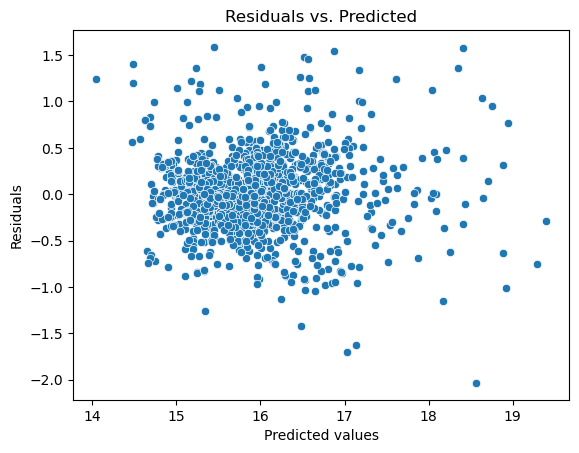

In [124]:
# Calculate the residuals
residuals = y - ridge_model.predict(X_tr)

# Plot predicted values vs. residuals
sns.scatterplot(x=ridge_model.predict(X_tr), y=residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Normality of errors

In [125]:
import matplotlib.pyplot as plt
import scipy.stats as stats

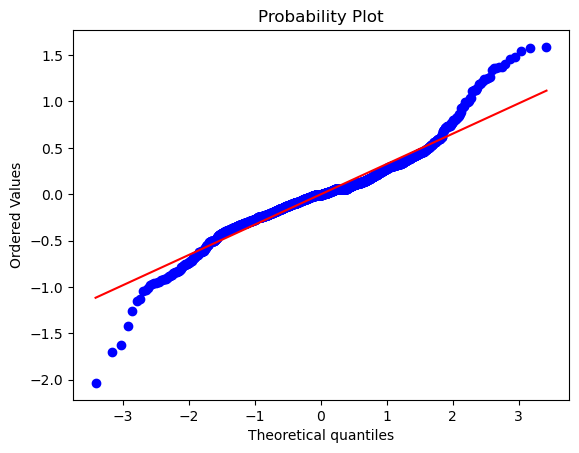

In [126]:
stats.probplot(residuals, dist = "norm", plot = plt);

### No perfect multicollinearity

In [127]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = X  

# Calculate VIF for each feature
vif_data = pd.Series([vif(variables, i) for i in range(variables.shape[1])], index=X.columns)

# Display the VIF results
print(vif_data)

const                       615.188863
Bedrooms                     17.464026
Building                      4.298019
Apartment                     4.726282
Commercial                    3.536144
House                         1.219007
Cumilla_city                  1.171916
Dhaka_city                    1.325424
Gazipur_city                  1.132072
Narayanganj_city              3.972007
Floor_area_log               10.625990
Bedrooms_3                    5.210184
Bathrooms_3                  35.177946
Floor_no_2                    1.176569
Bathrooms_log                26.173630
Bathrooms_Floor_area_log    109.080869
dtype: float64


### Finaly validation of the model

In [128]:
print(f"Test R²: {ridge_model.score(X_te, y_test)}")
print(f"Test Mean absolute error: {mae(np.exp(y_test), np.exp(ridge_model.predict(X_te)))}")

Test R²: 0.7759167510007611
Test Mean absolute error: 3392546.2607882223


## Lasso regression

In [129]:
from sklearn.linear_model import LassoCV

In [130]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins", "vacant", "Floor_area", 
                                   "Floor_area_number_ration", "Bedrooms_log", "Floor_no",
                                   "Bathrooms", "Floor_no", "Bedrooms_Bathrooms", "Buil_Commer_House", "Bedrooms_2",
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log", "Bedrooms_Bathrooms_2", "Bedrooms_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", "Bedrooms_2_Floor_area_log", "Bathrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [131]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [132]:
n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

Lasso_model = LassoCV(alphas = alphas, cv = 5)

Lasso_model.fit(X_tr, y)
print(f"Alpha: {Lasso_model.alpha_}")
print(f"Train R²: {Lasso_model.score(X_tr, y)}")
print(f"Mean absolute error: {mae(np.exp(y), np.exp(Lasso_model.predict(X_tr)))}")

Alpha: 0.001
Train R²: 0.7622230595108627
Mean absolute error: 3466443.13665751


In [133]:
coefficients = pd.Series(Lasso_model.coef_, index=X.columns)

with open('lasso_coefficients.txt', 'w') as file:
    for index, value in coefficients.items():
        file.write(f"{index}: {value}\n")

## Elestic net regression

In [134]:
from sklearn.linear_model import ElasticNetCV

In [135]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins", "vacant", "Floor_area", 
                                   "Floor_area_number_ration", "Bedrooms_log", "Floor_no_2",
                                   "Bathrooms", "Floor_no", "Bedrooms_Bathrooms", "Buil_Commer_House", "Bedrooms_2",
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log", "Bedrooms_Bathrooms_2", "Bedrooms_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", "Bedrooms_2_Floor_area_log", "Bathrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [136]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [137]:
alphas = 10 ** np.linspace(-3, 3, 200)
l1_ratios = np.linspace(.1, 1, 10)

enet_model = ElasticNetCV(alphas = alphas, l1_ratio = l1_ratios, cv = 5)

enet_model.fit(X_tr, y)

print(f"Alpha: {enet_model.alpha_}")
print(f"Lambda: {enet_model.alpha_}")
print(f"Train R²: {enet_model.score(X_tr, y)}")
print(f"Mean absolute error: {mae(np.exp(y), np.exp(enet_model.predict(X_tr)))}")

Alpha: 0.001
Lambda: 0.001
Train R²: 0.7627697500503838
Mean absolute error: 3463015.244198938


In [138]:
X = sm.add_constant(df_model.drop(["Price_in_taka", "price_log", "Bedroom_bins", "vacant", "Floor_area", 
                                   "Floor_area_number_ration", "Bedrooms_log", "Floor_no",
                                   "Bathrooms", "Floor_no", "Bedrooms_Bathrooms", "Buil_Commer_House", "Bedrooms_2",
                                   "Bathrooms_2", "Bedrooms_Bathrooms_log", "Bedrooms_Bathrooms_2", "Bedrooms_Floor_area_log",
                                   "Bedrooms_Bathrooms_Floor_area_log", "Bedrooms_2_Floor_area_log", "Bathrooms_2_Floor_area_log"], axis = 1))
y = df_model["price_log"]

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop in each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val))))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross validation R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross validation MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All validation R2s:  [0.791, 0.747, 0.764, 0.702, 0.748]
Cross validation R2s: 0.75 +- 0.029
All validation MAEs:  [3156743.592, 2295671.461, 6114911.578, 3679431.634, 4523251.419]
Cross validation MAEs: 3954001.937 +- 1300357.269


In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:35:58   Log-Likelihood:                -537.37
No. Observations:                1766   AIC:                             1107.
Df Residuals:                    1750   BIC:                             1194.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.9984      0.201     54.721      0.000      10.604      11.393
Bedrooms                     0.0727      0.018      4.139      0.000       0.038       0.107
Building                    -0.3324      0.045     -7.444      0.000      -0.420      -0.245
Apartment                   -0.2860      0.037     -7.749      0.000      -0.358      -0.214
Commercial                   0.7609      0.046     16.711      0.000       0.672       0.850
House                       -0.0763      0.022     -3.414      0.001      -0.120      -0.032
Cumilla_city                -0.2443      0.040     -6.099      0.000      -0.323      -0.166
Dhaka_city                   0.1784      0.019      9.516      0.000       0.142       0.215
Gazipur_city                -0.2761      0.037     -7.502      0.000      -0.348      -0.204
Narayanganj_city            -1.1360      0.048    -23.424      0.000      -1.231      -1.041
Floor_area_log               0.5585      0.032     17.198      0.000       0.495       0.622
Bedrooms_3               -2.634e-05   5.91e-06     -4.456      0.000   -3.79e-05   -1.47e-05
Bathrooms_3                 -0.0055      0.001     -9.747      0.000      -0.007      -0.004
Floor_no_2                  -0.0006      0.000     -1.811      0.070      -0.001     4.7e-05
Bathrooms_log               -0.7317      0.153     -4.771      0.000      -1.033      -0.431
Bathrooms_Floor_area_log     0.0852      0.009      9.017      0.000       0.067       0.104
==============================================================================
Omnibus:                      186.597   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1100.284
Skew:                           0.297   Prob(JB):                    1.19e-239
Kurtosis:                       6.821   Cond. No.                     9.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""